In [137]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from src.datasets.mnist import numpy_to_image
from src.datasets.utils import get_dataset
from src.estimator.OLS import OLSClient
from src.server import Server

cmap = LinearSegmentedColormap.from_list("black_white", [(0, 'blue'), (1, 'red')])

In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
X, y = get_dataset("mnist")
X.shape, y.shape

((60000, 784), (60000,))

In [140]:
#X, y = X[np.logical_or(y == 1, y == 7)],  y[np.logical_or(y == 1, y == 7)]

In [141]:
N = 5
clients = []

num_samples = np.random.randint(10, 100, N)

for i in range(N):
    idx = np.random.choice(range(X.shape[0]), num_samples[i])
    X_i, y_i = X[idx], y[idx]
    clients.append(OLSClient(i, X_i, y_i, lambda x: 1 / (1 + x)))

server = Server(clients)

In [142]:
server.aggregate(unbiased=True)

In [160]:
arr = clients[2].local_estimate()
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
arr.reshape((28, 28), order="C") * 255

array([[ 81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327],
       [ 81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  81.19751327,  81.19751327],
       [ 81.19751327,  81.19751327,  81.19751327,  81.19751327,
         81.19751327,  81.19751327,  8

In [151]:
clients[2].local_estimate().reshape((28, 28)) * 1e20

array([[-2.50072436e+01,  4.70908626e+01,  5.70690679e+01,
        -5.22003013e+00,  6.37117798e+01,  1.48901841e+01,
         1.49706630e+01, -4.76595621e+01,  1.49691916e+01,
        -3.15514353e+00,  5.30950410e+00,  6.75296896e-01,
        -1.20939963e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

<Axes: >

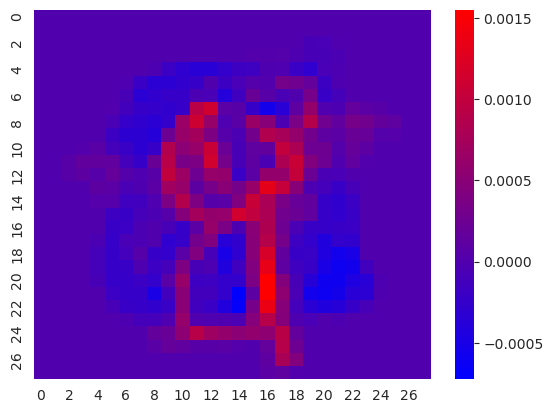

In [145]:
sns.heatmap(clients[2].local_estimate().reshape((28, 28), order="C"), cmap=cmap)

<Axes: >

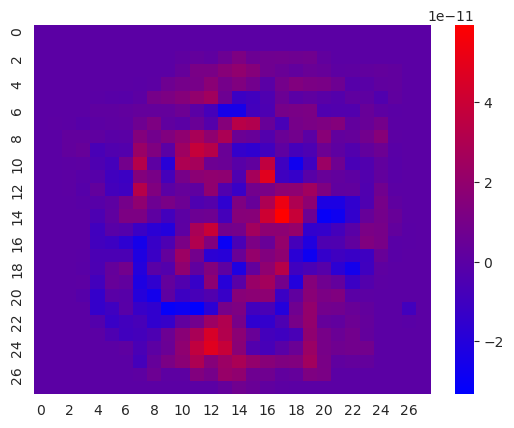

In [146]:
sns.heatmap(server.mtl[4].reshape((28, 28), order="C"), cmap=cmap)